# Knowledge Graph Construction Using AI
This notebook demonstrates the construction of a knowledge graph using AI techniques. We will use two different AI models to construct the knowledge graph and compare their performance.


In [7]:
import os

data_dir = 'data/reduced_mixed_3/reduced_mixed_3'

all_files = os.listdir(data_dir)
print(f"All files: {all_files}")


All files: ['indicatorDataMeta.json5', 'indicatorPivotDataMeta.json5', 'sdgIndicatorData__1.1.1.json5', 'sdgIndicatorData__1.2.1.json5', 'sdgIndicatorData__1.2.2.json5', 'sdgIndicatorData__1.3.1.json5', 'sdgIndicatorData__1.4.1.json5', 'sdgIndicatorData__1.4.2.json5', 'sdgIndicatorData__1.5.1.json5', 'sdgIndicatorData__1.5.2.json5', 'sdgIndicatorData__1.5.3.json5', 'sdgIndicatorData__1.5.4.json5', 'sdgIndicatorData__1.a.1.json5', 'sdgIndicatorData__1.a.2.json5', 'sdgIndicatorData__1.b.1.json5', 'sdgIndicatorData__10.1.1.json5', 'sdgIndicatorData__10.2.1.json5', 'sdgIndicatorData__10.3.1.json5', 'sdgIndicatorData__10.4.1.json5', 'sdgIndicatorData__10.4.2.json5', 'sdgIndicatorData__10.5.1.json5', 'sdgIndicatorData__10.6.1.json5', 'sdgIndicatorData__10.7.1.json5', 'sdgIndicatorData__10.7.2.json5', 'sdgIndicatorData__10.7.3.json5', 'sdgIndicatorData__10.7.4.json5', 'sdgIndicatorData__10.a.1.json5', 'sdgIndicatorData__10.b.1.json5', 'sdgIndicatorData__10.c.1.json5', 'sdgIndicatorData__11.1.

# Data Loading and Preprocessing:
* Loads SDG indicator data from multiple JSON5 files.
* Inspects and verifies data structure.

In [8]:
import json5

# Verify the content and structure of the files
data_entries = []
file_count = 0

for file_name in all_files:
    if file_name.startswith('sdgIndicatorData__') and file_name.endswith('.json5'):
        file_path = os.path.join(data_dir, file_name)
        file_count += 1
        with open(file_path, 'r') as f:
            try:
                data = json5.load(f)
                print(f"Loaded data from {file_name}: {data.keys()}")  # Print the keys to verify structure
                if 'data' in data:
                    data_entries.extend(data['data'])
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

print(f"Total files processed: {file_count}")
print(f"Total data entries loaded: {len(data_entries)}")
if len(data_entries) > 0:
    print(json5.dumps(data_entries[0], indent=2))
else:
    print("No data entries loaded.")


Loaded data from sdgIndicatorData__1.1.1.json5: dict_keys(['size', 'totalElements', 'totalPages', 'pageNumber', 'data'])
Loaded data from sdgIndicatorData__1.2.1.json5: dict_keys(['size', 'totalElements', 'totalPages', 'pageNumber', 'data'])
Loaded data from sdgIndicatorData__1.2.2.json5: dict_keys(['size', 'totalElements', 'totalPages', 'pageNumber', 'data'])
Loaded data from sdgIndicatorData__1.3.1.json5: dict_keys(['size', 'totalElements', 'totalPages', 'pageNumber', 'data'])
Loaded data from sdgIndicatorData__1.4.1.json5: dict_keys(['size', 'totalElements', 'totalPages', 'pageNumber', 'data'])
Loaded data from sdgIndicatorData__1.4.2.json5: dict_keys(['size', 'totalElements', 'totalPages', 'pageNumber', 'data'])
Loaded data from sdgIndicatorData__1.5.1.json5: dict_keys(['size', 'totalElements', 'totalPages', 'pageNumber', 'data'])
Loaded data from sdgIndicatorData__1.5.2.json5: dict_keys(['size', 'totalElements', 'totalPages', 'pageNumber', 'data'])
Loaded data from sdgIndicatorDat

# Define Knowledge Graph Schema:

Extracts nodes and relationships based on geoAreaName, indicator, timePeriodStart, value, and attributes.

In [9]:
nodes = set()
relationships = []

for entry in data_entries:
    country = entry['geoAreaName']
    indicator = entry['indicator'][0]
    year = entry['timePeriodStart']
    value = entry['value']
    unit = entry['attributes']['Units']
    
    # Add nodes
    nodes.add(country)
    nodes.add(indicator)
    nodes.add(year)
    nodes.add(unit)
    
    # Add relationship
    relationships.append((country, 'HAS_INDICATOR', indicator, year, value, unit))

print(f"Nodes: {len(nodes)}")
print(f"Relationships: {len(relationships)}")


Nodes: 396
Relationships: 696


# CNN Model:

The Convolutional Neural Network (CNN) model is a deep learning model that uses convolutional layers to capture patterns in the text data. The model is trained to classify text based on features extracted from the seriesDescription.



This notebook expands on the previous CNN model by experimenting with six variations.
Each variation adds different numbers and types of layers to analyze performance differences.


In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Embedding, SpatialDropout1D, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

In [11]:
# Parameters for text preprocessing
max_words = 5000
max_seq_len = 250
embedding_dim = 100

In [12]:
# Preprocess data for CNN

def preprocess_cnn_data(data):
    texts = [entry['seriesDescription'] for entry in data]
    labels = [1 if any(token in entry['seriesDescription'] for token in ['population', 'line', 'sex']) else 0 for entry in data]
    return texts, labels

# Tokenize and pad sequences
def tokenize_and_pad(texts):
    tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_seq_len, padding='post', truncating='post')
    return padded_sequences, tokenizer


## Define CNN Variations:


### Variation 1: Basic CNN Model
A simple CNN with one Conv1D layer and GlobalMaxPooling1D layer.

In [13]:
def create_cnn_variation_1():
    model = Sequential([
        Embedding(max_words, embedding_dim, input_length=max_seq_len),
        SpatialDropout1D(0.2),
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

The create_cnn_variation_1 function defines a CNN model for text classification. It uses an Embedding layer for word representations, followed by SpatialDropout1D to prevent overfitting. A Conv1D layer with 128 filters captures local text patterns, and GlobalMaxPooling1D reduces dimensionality by extracting key features. A Dense layer with sigmoid activation outputs binary classification results. The model is compiled with binary cross-entropy loss, the Adam optimizer, and accuracy as the metric, making it efficient and suitable for binary text classification tasks.

### Variation 2: Adding Extra Conv1D and MaxPooling Layers

Introduces a second Conv1D layer and a MaxPooling layer to capture additional features.

In [14]:
def create_cnn_variation_2():
    model = Sequential([
        Embedding(max_words, embedding_dim, input_length=max_seq_len),
        SpatialDropout1D(0.2),
        Conv1D(128, 5, activation='relu'),
        MaxPooling1D(pool_size=5),
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



The create_cnn_variation_2 function defines a CNN model for text classification, extending the architecture of Variation 1. It includes an Embedding layer for word representation and a SpatialDropout1D layer to reduce overfitting. The model incorporates two Conv1D layers with 128 filters and ReLU activation, separated by a MaxPooling1D layer that reduces dimensionality and highlights key features. A GlobalMaxPooling1D layer follows to further extract prominent features. The final Dense layer with sigmoid activation outputs the binary classification results. Compiled with binary cross-entropy loss, the Adam optimizer, and accuracy as the metric, this architecture is more complex than Variation 1, potentially improving feature extraction and performance for text

### Variation 3: Adding Dropout for Regularization

Adds Dropout layers to prevent overfitting.

In [15]:
def create_cnn_variation_3():
    model = Sequential([
        Embedding(max_words, embedding_dim, input_length=max_seq_len),
        SpatialDropout1D(0.2),
        Conv1D(128, 5, activation='relu'),
        Dropout(0.3),
        MaxPooling1D(pool_size=5),
        Conv1D(128, 5, activation='relu'),
        Dropout(0.3),
        GlobalMaxPooling1D(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


The create_cnn_variation_3 function defines a CNN model for text classification, enhancing Variation 2 by incorporating additional dropout layers. It starts with an Embedding layer for word vectorization and a SpatialDropout1D layer to reduce overfitting. A Conv1D layer with 128 filters and ReLU activation is followed by a Dropout layer with a rate of 0.3 to further mitigate overfitting. A MaxPooling1D layer reduces dimensionality before another Conv1D layer with similar specifications, again followed by a Dropout layer. A GlobalMaxPooling1D layer then extracts the most prominent features, and the model concludes with a Dense layer with sigmoid activation for binary classification. Compiled with binary cross-entropy loss, the Adam optimizer, and accuracy as the metric, this model introduces more robust regularization, making it well-suited for datasets prone to overfitting.

### Variation 4: Increasing Conv1D Filters

Increases the number of filters in Conv1D layers to learn more features.


In [16]:
def create_cnn_variation_4():
    model = Sequential([
        Embedding(max_words, embedding_dim, input_length=max_seq_len),
        SpatialDropout1D(0.2),
        Conv1D(256, 5, activation='relu'),
        MaxPooling1D(pool_size=5),
        Conv1D(256, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


The create_cnn_variation_4 function defines a CNN model for text classification with increased filter complexity. It begins with an Embedding layer for word vector representation, followed by a SpatialDropout1D layer to prevent overfitting. The model features two Conv1D layers, each with 256 filters and ReLU activation, providing enhanced feature extraction capabilities. A MaxPooling1D layer between the convolutional layers reduces dimensionality and focuses on key patterns. The extracted features are then further condensed by a GlobalMaxPooling1D layer. Finally, a Dense layer with sigmoid activation outputs the binary classification results. The model is compiled with binary cross-entropy loss, the Adam optimizer, and accuracy as the metric. This variation increases the number of filters compared to previous models, potentially improving performance on complex datasets.

### Variation 5: Deeper Stacking of Conv1D Layers

Adds additional Conv1D layers to create a deeper model.

In [17]:
def create_cnn_variation_5():
    model = Sequential([
        Embedding(max_words, embedding_dim, input_length=max_seq_len),
        SpatialDropout1D(0.2),
        Conv1D(128, 5, activation='relu'),
        Conv1D(128, 3, activation='relu'),
        MaxPooling1D(pool_size=3),
        Conv1D(128, 3, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


The create_cnn_variation_5 function defines a CNN model for text classification with a focus on multi-scale feature extraction. It starts with an Embedding layer for word vectorization and a SpatialDropout1D layer to reduce overfitting. The model includes three Conv1D layers with 128 filters, each capturing patterns at varying scales, with kernel sizes of 5 and 3. A MaxPooling1D layer reduces dimensionality after the second convolutional layer, enabling effective feature extraction while preserving key information. A GlobalMaxPooling1D layer further condenses the output to the most significant features. Finally, a Dense layer with sigmoid activation produces binary classification results. The model is compiled using binary cross-entropy loss, the Adam optimizer, and accuracy as the evaluation metric. This variation's multi-scale approach makes it suitable for capturing both broad and fine-grained features in text data.

### Variation 6: Combining Depth and Regularization

Combines deeper Conv1D layers with Dropout for better generalization.

In [18]:
def create_cnn_variation_6():
    model = Sequential([
        Embedding(max_words, embedding_dim, input_length=max_seq_len),
        SpatialDropout1D(0.2),
        Conv1D(128, 5, activation='relu'),
        Dropout(0.3),
        Conv1D(128, 3, activation='relu'),
        MaxPooling1D(pool_size=3),
        Conv1D(128, 3, activation='relu'),
        Dropout(0.3),
        GlobalMaxPooling1D(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

The create_cnn_variation_6 function defines a CNN model for text classification, building on previous variations with enhanced dropout regularization. It begins with an Embedding layer for word vector representation and a SpatialDropout1D layer to combat overfitting. The architecture features three Conv1D layers with 128 filters, each capturing different text patterns, with kernel sizes of 5 and 3. Two Dropout layers with a rate of 0.3 are strategically placed after the first and third convolutional layers to enhance regularization and improve generalization. A MaxPooling1D layer reduces dimensionality after the second convolutional layer, followed by a GlobalMaxPooling1D layer to extract the most critical features. The model concludes with a Dense layer with sigmoid activation for binary classification. Compiled with binary cross-entropy loss, the Adam optimizer, and accuracy as the metric, this variation combines multi-scale feature extraction with strong regularization, making it robust for text datasets prone to overfitting.

## Train and Evaluate Each CNN Variation:


In [19]:
def train_and_evaluate_cnn(model_function, train_data, test_data):
    train_texts, train_labels = preprocess_cnn_data(train_data)
    test_texts, test_labels = preprocess_cnn_data(test_data)

    train_sequences, tokenizer = tokenize_and_pad(train_texts)
    test_sequences = pad_sequences(tokenizer.texts_to_sequences(test_texts), maxlen=max_seq_len, padding='post', truncating='post')

    model = model_function()
    model.fit(train_sequences, np.array(train_labels), epochs=5, batch_size=32, validation_data=(test_sequences, np.array(test_labels)), verbose=2)

    y_pred = (model.predict(test_sequences) > 0.5).astype("int32")
    accuracy = accuracy_score(test_labels, y_pred)
    f1 = f1_score(test_labels, y_pred)
    return {'accuracy': accuracy, 'f1-score': f1}


In [20]:
# Dataset Preparation
train_data, test_data = train_test_split(data_entries, test_size=0.2, random_state=42)


In [21]:
# Evaluate All Variations
results = {}
variations = [
    ("Variation 1", create_cnn_variation_1),
    ("Variation 2", create_cnn_variation_2),
    ("Variation 3", create_cnn_variation_3),
    ("Variation 4", create_cnn_variation_4),
    ("Variation 5", create_cnn_variation_5),
    ("Variation 6", create_cnn_variation_6)
]

In [22]:
for name, model_function in variations:
    print(f"Training and evaluating {name}...")
    metrics = train_and_evaluate_cnn(model_function, train_data, test_data)
    results[name] = metrics


Training and evaluating Variation 1...


c:\Users\sabih.rehman\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
18/18 - 2s - 112ms/step - accuracy: 0.6313 - loss: 0.6391 - val_accuracy: 0.7857 - val_loss: 0.4902
Epoch 2/5
18/18 - 0s - 22ms/step - accuracy: 0.7518 - loss: 0.4977 - val_accuracy: 0.9214 - val_loss: 0.4056
Epoch 3/5
18/18 - 0s - 22ms/step - accuracy: 0.9568 - loss: 0.2983 - val_accuracy: 0.9857 - val_loss: 0.1762
Epoch 4/5
18/18 - 0s - 25ms/step - accuracy: 0.9856 - loss: 0.1102 - val_accuracy: 0.9857 - val_loss: 0.0787
Epoch 5/5
18/18 - 1s - 28ms/step - accuracy: 0.9946 - loss: 0.0363 - val_accuracy: 0.9857 - val_loss: 0.0565
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Training and evaluating Variation 2...
Epoch 1/5


c:\Users\sabih.rehman\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


18/18 - 2s - 119ms/step - accuracy: 0.6871 - loss: 0.6203 - val_accuracy: 0.7857 - val_loss: 0.5639
Epoch 2/5
18/18 - 1s - 30ms/step - accuracy: 0.6871 - loss: 0.5354 - val_accuracy: 0.8714 - val_loss: 0.3899
Epoch 3/5
18/18 - 0s - 28ms/step - accuracy: 0.9371 - loss: 0.2740 - val_accuracy: 0.9429 - val_loss: 0.1841
Epoch 4/5
18/18 - 1s - 31ms/step - accuracy: 0.9946 - loss: 0.0546 - val_accuracy: 0.9571 - val_loss: 0.1156
Epoch 5/5
18/18 - 1s - 31ms/step - accuracy: 0.9982 - loss: 0.0100 - val_accuracy: 0.9857 - val_loss: 0.1013
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Training and evaluating Variation 3...
Epoch 1/5


c:\Users\sabih.rehman\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


18/18 - 2s - 136ms/step - accuracy: 0.6781 - loss: 0.6383 - val_accuracy: 0.7857 - val_loss: 0.5996
Epoch 2/5
18/18 - 1s - 30ms/step - accuracy: 0.6871 - loss: 0.5560 - val_accuracy: 0.7857 - val_loss: 0.4630
Epoch 3/5
18/18 - 1s - 33ms/step - accuracy: 0.8363 - loss: 0.3485 - val_accuracy: 0.9500 - val_loss: 0.2623
Epoch 4/5
18/18 - 1s - 32ms/step - accuracy: 0.9892 - loss: 0.1018 - val_accuracy: 0.9571 - val_loss: 0.1192
Epoch 5/5
18/18 - 1s - 32ms/step - accuracy: 0.9946 - loss: 0.0153 - val_accuracy: 0.9786 - val_loss: 0.0826
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002C0C37D53A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please defin

c:\Users\sabih.rehman\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


18/18 - 2s - 127ms/step - accuracy: 0.6888 - loss: 0.6313 - val_accuracy: 0.7857 - val_loss: 0.5552
Epoch 2/5
18/18 - 1s - 43ms/step - accuracy: 0.6871 - loss: 0.4925 - val_accuracy: 0.7857 - val_loss: 0.3235
Epoch 3/5
18/18 - 1s - 43ms/step - accuracy: 0.8939 - loss: 0.2952 - val_accuracy: 0.9357 - val_loss: 0.2519
Epoch 4/5
18/18 - 1s - 42ms/step - accuracy: 0.9802 - loss: 0.1430 - val_accuracy: 0.9429 - val_loss: 0.1723
Epoch 5/5
18/18 - 1s - 43ms/step - accuracy: 0.9946 - loss: 0.0218 - val_accuracy: 0.9429 - val_loss: 0.1457
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Training and evaluating Variation 5...
Epoch 1/5


c:\Users\sabih.rehman\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


18/18 - 3s - 140ms/step - accuracy: 0.6781 - loss: 0.6359 - val_accuracy: 0.7857 - val_loss: 0.5805
Epoch 2/5
18/18 - 1s - 37ms/step - accuracy: 0.6871 - loss: 0.5325 - val_accuracy: 0.8429 - val_loss: 0.3483
Epoch 3/5
18/18 - 1s - 34ms/step - accuracy: 0.9299 - loss: 0.2294 - val_accuracy: 0.9571 - val_loss: 0.1322
Epoch 4/5
18/18 - 1s - 32ms/step - accuracy: 0.9928 - loss: 0.0324 - val_accuracy: 0.9571 - val_loss: 0.1376
Epoch 5/5
18/18 - 1s - 34ms/step - accuracy: 0.9982 - loss: 0.0051 - val_accuracy: 0.9714 - val_loss: 0.0987
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Training and evaluating Variation 6...
Epoch 1/5


c:\Users\sabih.rehman\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


18/18 - 3s - 169ms/step - accuracy: 0.6655 - loss: 0.6441 - val_accuracy: 0.7857 - val_loss: 0.5944
Epoch 2/5
18/18 - 1s - 38ms/step - accuracy: 0.6871 - loss: 0.5941 - val_accuracy: 0.7857 - val_loss: 0.4823
Epoch 3/5
18/18 - 1s - 39ms/step - accuracy: 0.6871 - loss: 0.4247 - val_accuracy: 0.8857 - val_loss: 0.2876
Epoch 4/5
18/18 - 1s - 37ms/step - accuracy: 0.9119 - loss: 0.2579 - val_accuracy: 0.9357 - val_loss: 0.3131
Epoch 5/5
18/18 - 1s - 39ms/step - accuracy: 0.9838 - loss: 0.1151 - val_accuracy: 0.9357 - val_loss: 0.3540
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


## Visualization of Results:


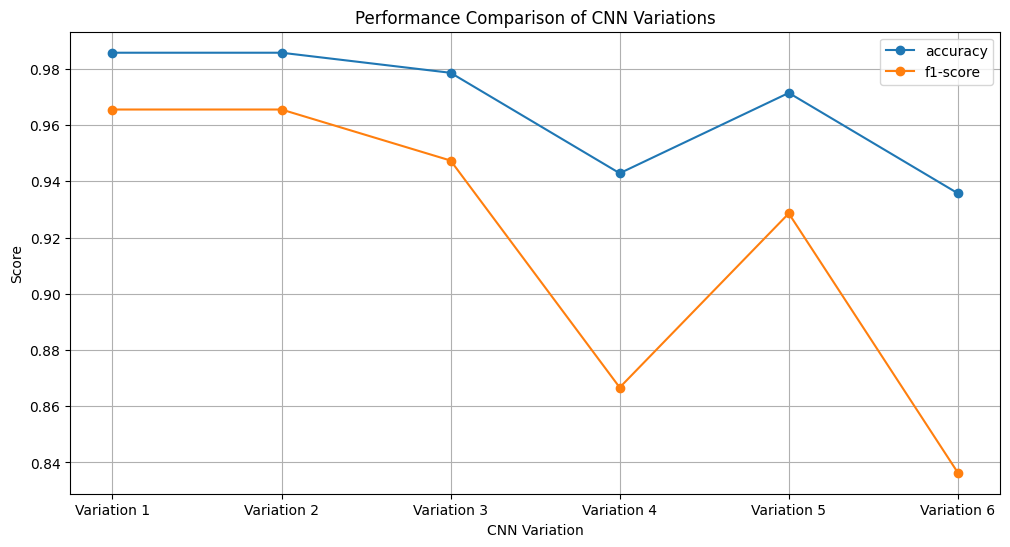

In [23]:
# Visualization of Results
metrics = ['accuracy', 'f1-score']
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    scores = [results[name][metric] for name, _ in variations]
    plt.plot(range(1, 7), scores, marker='o', label=metric)

plt.title('Performance Comparison of CNN Variations')
plt.xlabel('CNN Variation')
plt.ylabel('Score')
plt.legend()
plt.xticks(range(1, 7), [name for name, _ in variations])
plt.grid()
plt.show()


The graph illustrates the performance comparison of various CNN variations using accuracy and F1-score as evaluation metrics. Accuracy remains consistently high across the variations, with Variations 1 and 2 achieving the best results, indicating their strong overall predictive performance. However, a slight decline is observed in accuracy for Variations 3, 4, and 6.

The F1-score, on the other hand, shows more variability. While Variation 5 achieves the highest F1-score, indicating a strong balance between precision and recall, Variation 6 exhibits a dramatic drop, suggesting challenges in handling imbalanced datasets or maintaining an effective precision-recall trade-off. The discrepancies between accuracy and F1-score, particularly in Variation 6, emphasize the importance of considering F1-score in addition to accuracy, especially for tasks with imbalanced classes.

Overall, Variations 1 and 2 perform well on both metrics, making them promising candidates for further exploration or deployment. The poor F1-score for Variation 6 warrants further investigation and optimization to improve its performance.